## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [4]:
print("x_train samples:",x_train.shape[0])
print("y_train samples:",y_train.shape[0])
print("x_test samples:",x_test.shape[0])
print("y_test samples:",y_test.shape[0])

x_train samples: 60000
y_train samples: (60000,)
x_test samples: (10000, 28, 28)
y_test samples: (10000,)


In [0]:
""

### Find dimensions of an image in the dataset

In [6]:
print("x_train samples:",x_train.shape)
print("y_train samples:",y_train.shape)
print("x_test samples:",x_test.shape)
print("y_test samples:",y_test.shape)

x_train samples: (60000, 28, 28)
y_train samples: (60000,)
x_test samples: (10000, 28, 28)
y_test samples: (10000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [8]:
import tensorflow as tf
import keras

In [9]:
trainY = keras.utils.to_categorical(y_train)
testY = keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train = x_train.reshape(60000, 784)
print(x_train.shape)
x_test = x_test.reshape(10000, 784)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Import the necessary layers from keras to build the model

In [19]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization

In [21]:
model = Sequential()
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, trainY, 
          validation_data=(x_test, testY), 
          epochs=20,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.4835 - acc: 0.8363 - val_loss: 0.5091 - val_acc: 0.8265
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.4699 - acc: 0.8414 - val_loss: 0.5006 - val_acc: 0.8271
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.4591 - acc: 0.8435 - val_loss: 0.4857 - val_acc: 0.8311
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.4499 - acc: 0.8458 - val_loss: 0.4820 - val_acc: 0.8300
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.4419 - acc: 0.8485 - val_loss: 0.4727 - val_acc: 0.8346
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.4350 - acc: 0.8507 - val_loss: 0.4721 - val_acc: 0.8333
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.4290 - acc: 0.8528 - val_loss: 0.4620 - val_acc

In [24]:
print(history.history['acc'])
print(history.history['val_acc'])

[0.8362999985615412, 0.8414499976237615, 0.8435499982039134, 0.8457833313941956, 0.8485499999920527, 0.8507499986886978, 0.8527833325664202, 0.8542833318312962, 0.8558833316961925, 0.8565833322207133, 0.8584833339850108, 0.8595499997337659, 0.8610166651010513, 0.8625166656573614, 0.8630333326260249, 0.8646999989946683, 0.8659166666865349, 0.8673166670401891, 0.8676333335042, 0.8681833334763844]
[0.826499999165535, 0.8270999968051911, 0.8310999953746796, 0.8299999994039535, 0.8345999991893769, 0.8332999992370606, 0.8380999982357025, 0.8391999983787537, 0.8423000031709671, 0.8425999951362609, 0.8464999979734421, 0.8433999979496002, 0.8463999956846238, 0.8466000002622605, 0.8469999963045121, 0.8478999996185302, 0.8508000004291535, 0.8491999953985214, 0.8517999970912933, 0.8539000004529953]


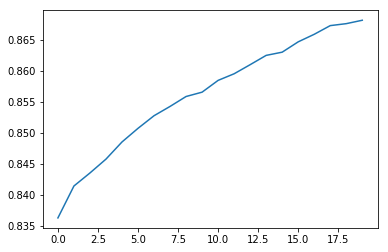

In [25]:
plt.plot(history.history['acc'])
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.5445 - acc: 0.8116 - val_loss: 0.4485 - val_acc: 0.8413
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.4013 - acc: 0.8585 - val_loss: 0.4025 - val_acc: 0.8601
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3611 - acc: 0.8711 - val_loss: 0.3898 - val_acc: 0.8616
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3373 - acc: 0.8787 - val_loss: 0.3734 - val_acc: 0.8673
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3198 - acc: 0.8852 - val_loss: 0.3608 - val_acc: 0.8721
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3038 - acc: 0.8897 - val_loss: 0.3439 - val_acc: 0.8772
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2905 - acc: 0.8947 - val_loss: 0.3699 - val_acc

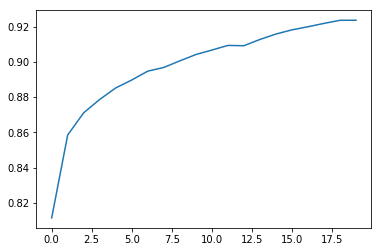

In [26]:
#with adam optimizer
model = Sequential()
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, trainY, 
          validation_data=(x_test, testY), 
          epochs=20,
          batch_size=100)
print(history.history['acc'])
print(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.show()

In [32]:
from keras.utils.vis_utils import plot_model

In [38]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

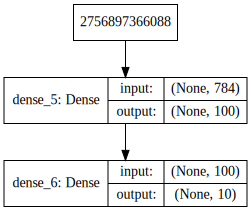

In [42]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

#### Applying Relu and Drop out

In [43]:
#Hidden layers
model.add(keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(keras.layers.Dropout(0.5))

#Hidden layers
model.add(keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(keras.layers.Dropout(0.3))

#Output layer
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
#Train the model
model.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.4809 - acc: 0.8763 - val_loss: 0.4348 - val_acc: 0.8732
Epoch 2/30
60000/60000 [==============================] - 11s 191us/step - loss: 0.3482 - acc: 0.8990 - val_loss: 0.4598 - val_acc: 0.8551
Epoch 3/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.3285 - acc: 0.9012 - val_loss: 0.3996 - val_acc: 0.8684
Epoch 4/30
60000/60000 [==============================] - 12s 200us/step - loss: 0.3139 - acc: 0.9027 - val_loss: 0.4603 - val_acc: 0.8557
Epoch 5/30
60000/60000 [==============================] - 12s 195us/step - loss: 0.2998 - acc: 0.9045 - val_loss: 0.4060 - val_acc: 0.8761
Epoch 6/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.2959 - acc: 0.9046 - val_loss: 0.4338 - val_acc: 0.8765
Epoch 7/30
60000/60000 [==============================] - 12s 198us/step - loss: 0.2890 - acc: 0.9065 - val_loss: 0.

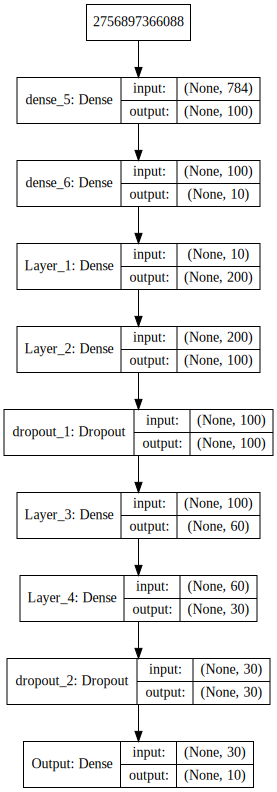

In [46]:
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               2200      
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.8563 - acc: 0.7146 - val_loss: 0.4371 - val_acc: 0.8468
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.5187 - acc: 0.8290 - val_loss: 0.4166 - val_acc: 0.8499
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.4451 - acc: 0.8503 - val_loss: 0.3980 - val_acc: 0.8609
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.4091 - acc: 0.8610 - val_loss: 0.3717 - val_acc: 0.8677
Epoch 5/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.3806 - acc: 0.8709 - val_loss: 0.3689 - val_acc: 0.8707
Epoch 6/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.3604 - acc: 0.8760 - val_loss: 0.3675 - val_acc: 0.8733
Epoch 7/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3487 - acc: 0.8805 - val_loss: 0.3470 - val_acc

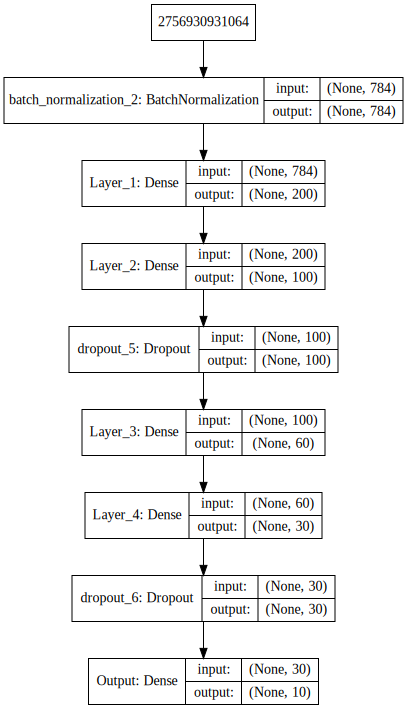

In [48]:
#batch normalization layer
model2 = keras.models.Sequential()

model2.add(keras.layers.BatchNormalization())
#Hidden layers
model2.add(keras.layers.Dense(200, activation='relu', name='Layer_1'))
model2.add(keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model2.add(keras.layers.Dropout(0.5))

#Hidden layers
model2.add(keras.layers.Dense(60, activation='relu', name='Layer_3'))
model2.add(keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model2.add(keras.layers.Dropout(0.3))

#Output layer
model2.add(keras.layers.Dense(10, activation='softmax', name='Output'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=30,
          batch_size=200)
SVG(model_to_dot(model2,show_shapes = True).create(prog='dot', format='svg'))

### learning rate and momentum

In [49]:
from keras.optimizers import SGD

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.6667 - acc: 0.7657 - val_loss: 0.5175 - val_acc: 0.8172
Epoch 2/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.4587 - acc: 0.8367 - val_loss: 0.5064 - val_acc: 0.8177
Epoch 3/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.4150 - acc: 0.8516 - val_loss: 0.4112 - val_acc: 0.8523
Epoch 4/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.3858 - acc: 0.8613 - val_loss: 0.4064 - val_acc: 0.8551
Epoch 5/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.3658 - acc: 0.8682 - val_loss: 0.3998 - val_acc: 0.8526
Epoch 6/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.3538 - acc: 0.8727 - val_loss: 0.3913 - val_acc: 0.8590
Epoch 7/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.3386 - acc: 0.8777 - val_loss: 0.4018 - val_acc

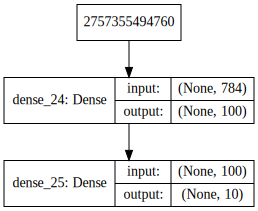

In [53]:
model3 = Sequential()
model3.add(Dense(units=100,activation="relu"))
model3.add(Dense(units=10,activation="softmax"))
optimizer = SGD(lr=0.2, momentum=0.1)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=30,
          batch_size=200)
SVG(model_to_dot(model3,show_shapes = True).create(prog='dot', format='svg'))

###### Same Model as above - Instead of accuracy at each epoch - Below code gives the consolidate accuracy (Notice: The model.evaluate line at the last is the only difference from previous code)

In [30]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train,trainY, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, trainY, verbose=0)
    return score

In [31]:
lr = 0.00001
Lambda = 0
train_and_test_loop1(1, lr, Lambda)

Epoch 1/1
60000/60000 [==============================] - 2s 32us/step - loss: 2.4130 - acc: 0.1161


[2.403026812362671, 0.1198]

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

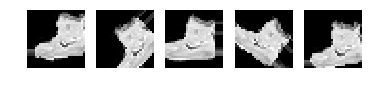

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

###  Report the final train and validation accuracy

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**